# Introduction


We realize that there are various enormous gracefully chain of grocery stores around the country.Here I have taken a dataset from kaggle called "Big Mart Sales Prediction".In request to see the expansion of deals, I have in this way examined the individual successive itemsets,through the dataset available.This is done so as to anticipate the deals of the organization stores later on.The various processes used are:


> 1.Exploring the data 

> 2.Feature Engineering

> 3.Data Preprocessing

> 4.Evaluation



Techniques used are :

Linear Regression, Decision Tree Model and Random Forest Model.



# 1.Exploring the data 

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
#Loading all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,IsolationForest,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification,classification_report
from sklearn.externals import joblib
from sklearn.decomposition import PCA

In [6]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
ls

drive/  sample_data/


In [8]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [9]:
# importing data

train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**The number of rows in train dataset is 8523 and number of column is 12. And the number of rows in test dataset is 5681 and number of column is 11.**

In [12]:
train.shape

(8523, 12)

In [13]:
test.shape

(5681, 11)

**Statistical details of the dataset is analyzed using describe().**


In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


**The summary of the dataset is given by using info().**

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Checking the missing values in dataset**

In [18]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Filling null values with mean/ mode/ median**

In [20]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])

test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])

In [21]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

**Exploratory data analysis**

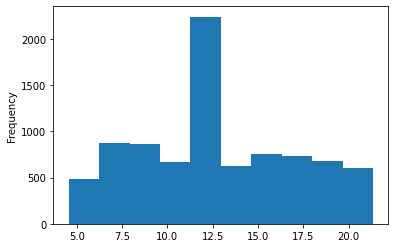

In [23]:
train.Item_Weight.plot(kind='hist')

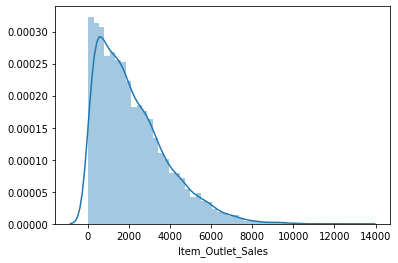

In [24]:
sns.distplot(train["Item_Outlet_Sales"])

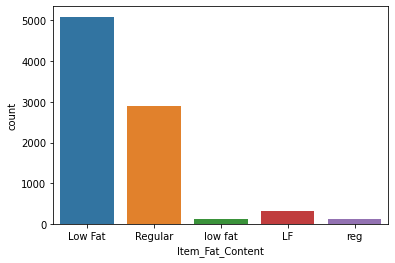

In [25]:
sns.countplot(x='Item_Fat_Content',data=train)

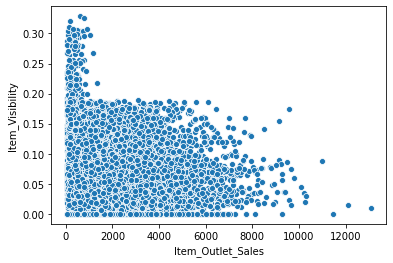

In [26]:
sns.scatterplot(x="Item_Outlet_Sales",y="Item_Visibility",data=train)


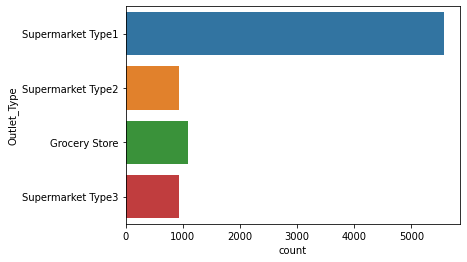

In [27]:
sns.countplot(y='Outlet_Type',data=train)

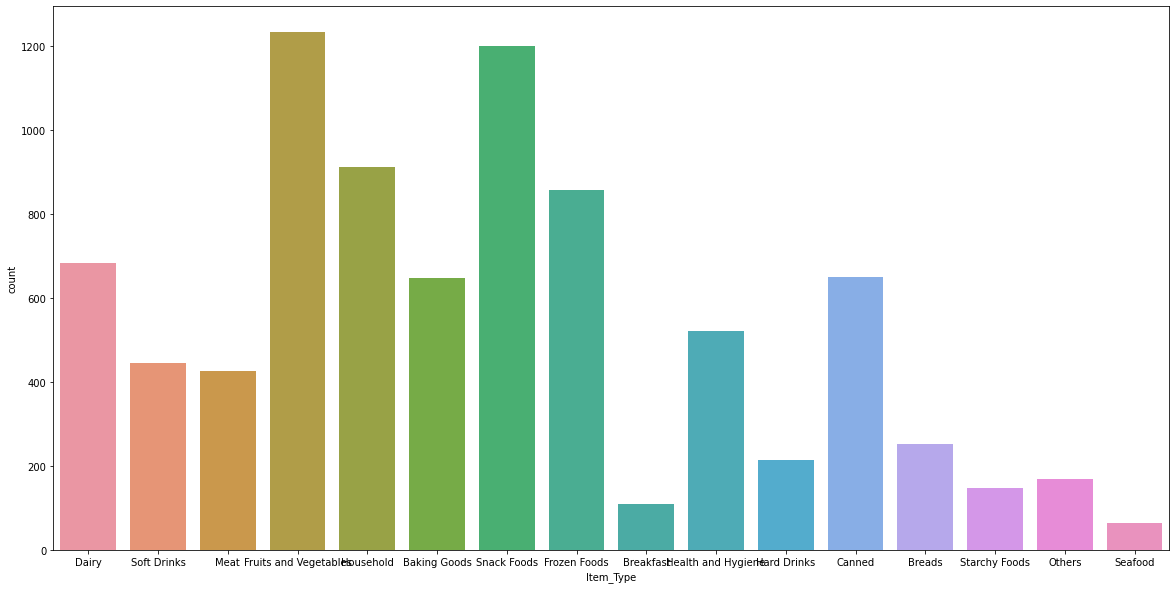

In [28]:
plt.rcParams["figure.figsize"] = (20,10)
sns.countplot(x='Item_Type', data=train)

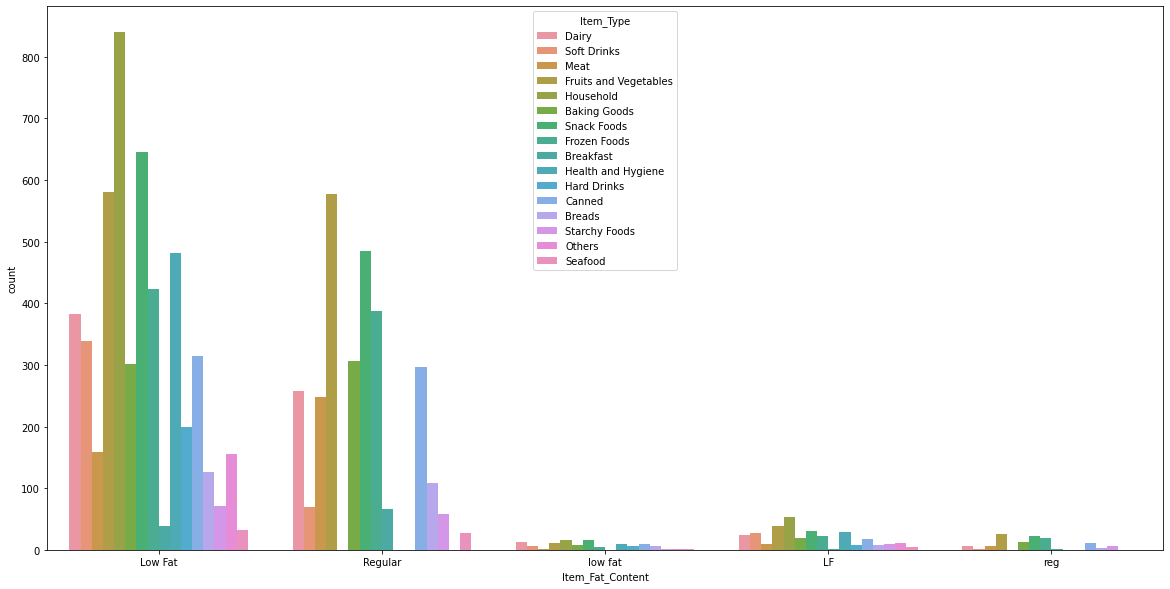

In [29]:
sns.countplot(x="Item_Fat_Content",hue="Item_Type",data=train)

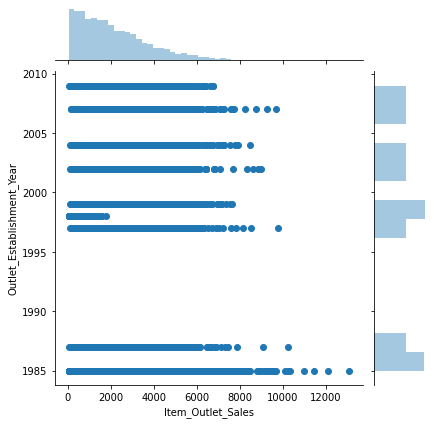

In [30]:
sns.jointplot(x="Item_Outlet_Sales",y="Outlet_Establishment_Year",data=train)

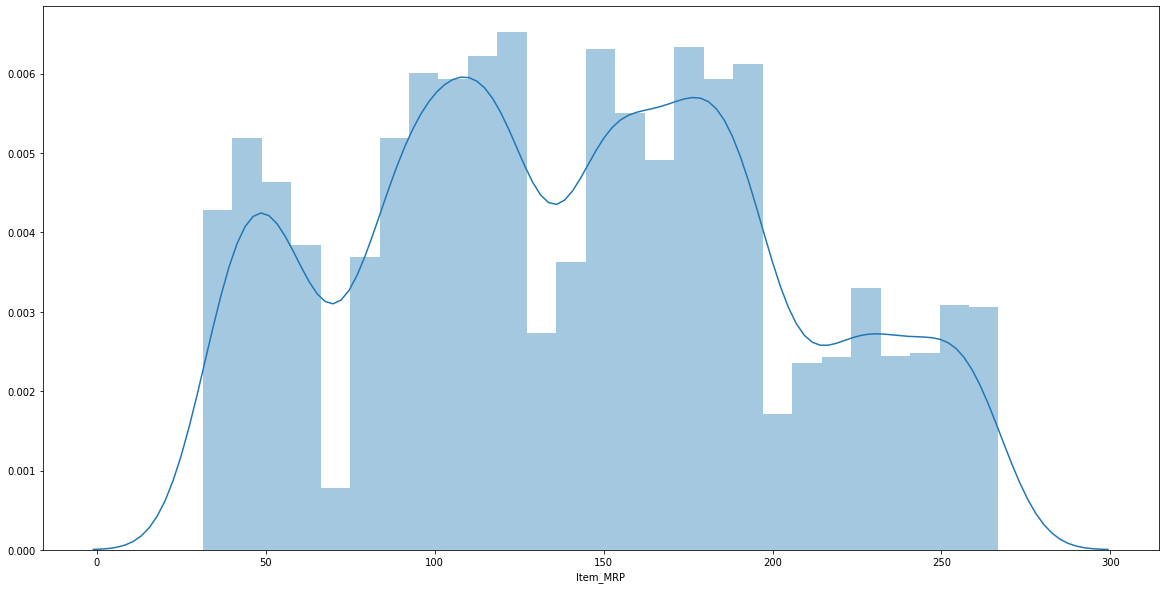

In [31]:
sns.distplot(train["Item_MRP"])

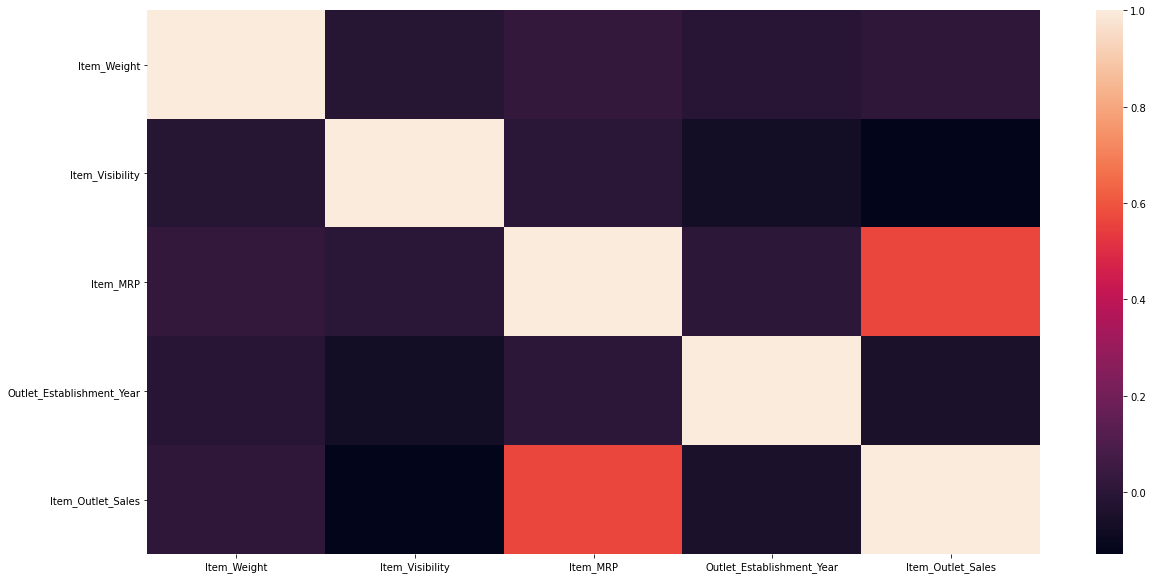

In [32]:
#finding correlation

sns.heatmap(train.corr(),)

# 2)Feature Engineering:

Subsequent to evacuating missing values that may cause negative effects on the dataset, I proceeded onward to Feature Engineering procedure where I utilize feature information on the information and classify them into highlights utilizing ML.

In [33]:
def create_Category(data):
    if str(data['Item_Identifier']).startswith('NC'):
        return 'Non Consumable'
    elif str(data['Item_Identifier']).startswith('FD'):
        return 'Food'
    else:
        return 'Drinks'

train['Item_Category']= train.apply(create_Category,axis=1)
test['Item_Category']= test.apply(create_Category,axis=1)

train['Item_Category'].value_counts()

Food              6125
Non Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [34]:
#fat column correction

def FatCorrection(train):
    if train.Item_Category == "Non Consumable":
        return "No Fat"
    else:
        return train.Item_Fat_Content
    
train['Item_Fat_Content']= train.apply(FatCorrection,axis=1)
test['Item_Fat_Content']= test.apply(FatCorrection,axis=1)

train['Item_Fat_Content'].value_counts()

Low Fat    3612
Regular    2889
No Fat     1599
LF          222
reg         117
low fat      84
Name: Item_Fat_Content, dtype: int64

In [35]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [36]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# 3)Model Building:

In [86]:
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [89]:
train2.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,OUT010,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,OUT013,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [90]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales


In [91]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [92]:
X_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,0.016047,9.30,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,48.2692,0.019278,5.92,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,141.6180,0.016760,17.50,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,182.0950,0.000000,19.20,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,53.8614,0.000000,8.93,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [93]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# 4)Evaluation

In [46]:
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

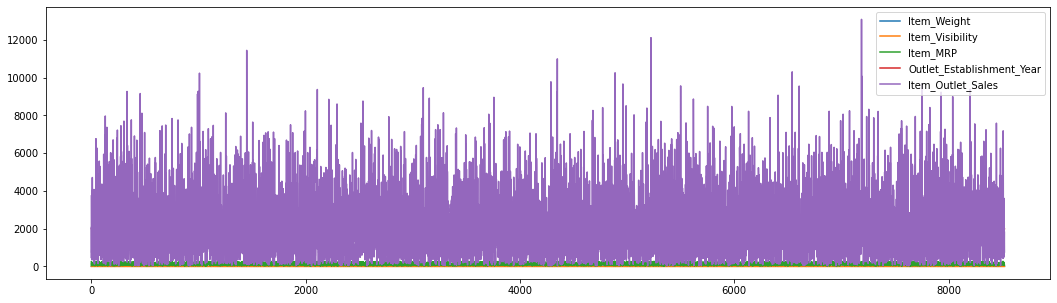

In [47]:
train.plot(figsize=(18,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4911079a58>,
      dtype=object)

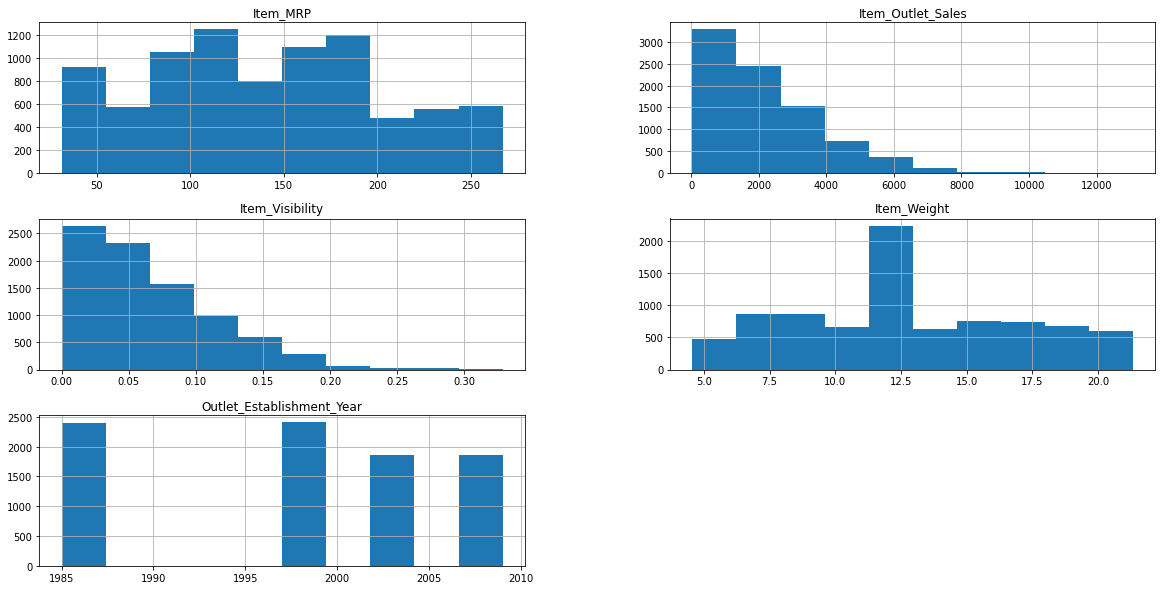

In [48]:
train.hist()

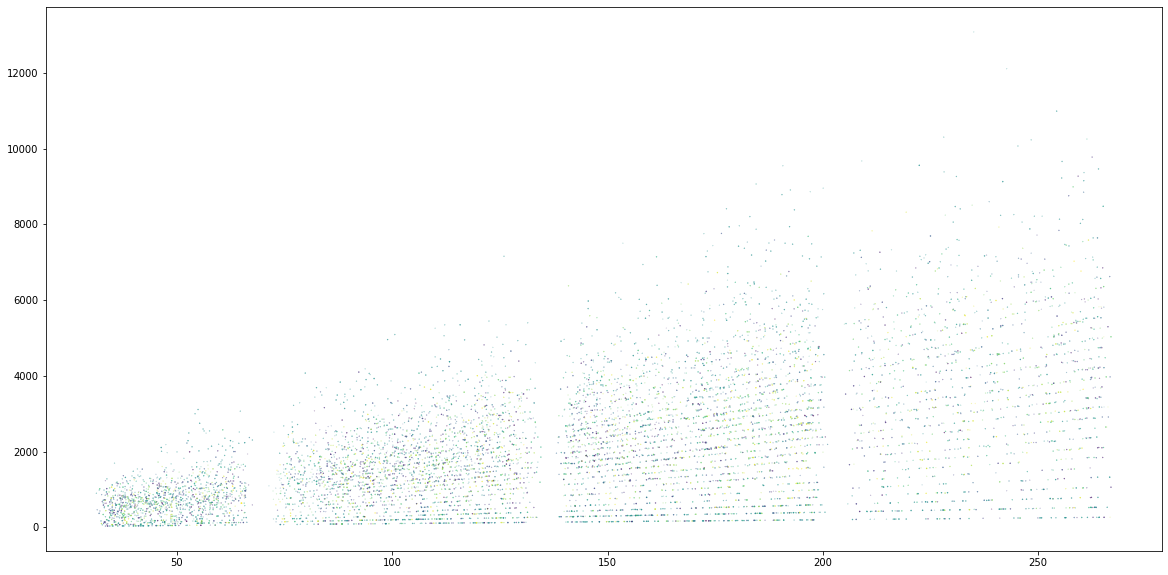

In [49]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'],train['Item_Visibility'],train['Item_Weight'])

**1)Linear Regression:**

In [94]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]


In [100]:
print("Labels:", list(some_labels))

Labels: [3735.138, 443.4228, 2097.27, 732.38, 994.7052]


In [56]:
y_pred

array([1848.53604783, 1472.81670435, 1875.65285894, ..., 1809.18796433,
       3565.6645235 , 1267.46171871])

In [102]:
from sklearn.metrics import mean_squared_error

Sales_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, Sales_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1127.2712261909362

In [103]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, Sales_predictions)
lin_mae

836.0124871797594

In [105]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [106]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1164.41847883 1139.06487807 1123.05419796 1110.06373646 1119.77869193
 1108.25030895 1114.31015033 1136.11017958 1138.61820907 1144.18316173]
Mean: 1129.7851992915525
Standard deviation: 16.877519239165004


**2)Decision Tree Model:**

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [112]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.56

In [111]:
r2_score(y_train, regressor.predict(X_train))

0.5634824962163059

In [116]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.75547261 0.74509312 0.73995267 0.75255581 0.75172542]


In [117]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1127


**Cross Validation on the training dataset -- Descision Tree Regressor**

In [120]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [121]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1636.5715666  1518.31409787 1537.63375184 1446.17597717 1616.78400933
 1441.3382619  1620.39778682 1527.98834324 1465.21655721 1598.02305339]
Mean: 1540.844340536439
Standard deviation: 70.5655778857073


**3)Random Forest Model:**

In [123]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
Sales_predictions = RF.predict(X_train)
RF_mse = mean_squared_error(y_train, Sales_predictions)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

1068.6048939679824

In [126]:
RF_mae = mean_absolute_error(y_train, Sales_predictions)
RF_mae

748.6971244613982

In [129]:
scores = cross_val_score(RF, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-scores)

In [130]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(RF_rmse_scores)

Scores: [1108.15058935 1103.21279808 1093.1724565  1056.56608632 1089.33569681
 1073.10752044 1050.28520851 1089.76517718 1071.48624741 1113.52453337]
Mean: 1084.8606313973726
Standard deviation: 20.315170609769673
